In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('c_data_html/data.csv')
df

,temp1,temp2,dewPt1,dewPt2,press1,press2,humid1,humid2,wdir1,wdir2,...,wspeed_max2,rain1,rain2,is_rain1,is_rain2,y_temp,y_temp_min,y_temp_max,y_rain,y_is_rain
0,26.5,27.1,21.0,21.0,1007.85,1008.36,74.6,70.6,9.0,6.0,...,15.0,0.0,0.0,0,0,27.2,24.0,32.0,0.0,0
1,27.1,27.2,21.0,21.9,1008.36,1008.59,70.6,73.4,6.0,8.0,...,19.0,0.0,0.0,0,0,27.4,23.0,32.0,0.0,0
2,27.2,27.4,21.9,20.0,1008.59,1007.80,73.4,65.2,8.0,4.0,...,17.0,0.0,0.0,0,0,27.0,23.0,33.0,0.0,0
3,27.4,27.0,20.0,21.8,1007.80,1007.95,65.2,74.7,4.0,6.0,...,17.0,0.0,0.0,0,0,26.5,23.0,33.0,0.0,0
4,27.0,26.5,21.8,21.3,1007.95,1008.61,74.7,74.8,6.0,6.0,...,28.0,0.0,0.0,0,0,26.7,21.0,33.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,27.2,27.2,20.9,22.2,1009.24,1009.80,70.1,75.7,11.0,11.0,...,15.0,0.0,0.0,0,0,27.0,23.0,33.0,0.0,0
3634,27.2,27.0,22.2,21.0,1009.80,1009.78,75.7,72.5,11.0,10.0,...,17.0,0.0,0.0,0,0,26.2,23.0,31.0,0.0,0
3635,27.0,26.2,21.0,20.5,1009.78,1010.34,72.5,72.7,10.0,12.0,...,13.0,0.0,0.0,0,0,26.6,21.0,32.0,0.0,0
3636,26.2,26.6,20.5,21.0,1010.34,1009.95,72.7,73.9,12.0,11.0,...,17.0,0.0,0.0,0,0,28.1,24.0,33.0,0.0,0


In [3]:
linear_related = df.corr()
linear_related.style.background_gradient(cmap='coolwarm').set_precision(2)

,temp1,temp2,dewPt1,dewPt2,press1,press2,humid1,humid2,wdir1,wdir2,wspeed1,wspeed2,temp_min1,temp_min2,dewPt_min1,dewPt_min2,press_min1,press_min2,humid_min1,humid_min2,wdir_min1,wdir_min2,wspeed_min1,wspeed_min2,temp_max1,temp_max2,dewPt_max1,dewPt_max2,press_max1,press_max2,humid_max1,humid_max2,wdir_max1,wdir_max2,wspeed_max1,wspeed_max2,rain1,rain2,is_rain1,is_rain2,y_temp,y_temp_min,y_temp_max,y_rain,y_is_rain
temp1,1.00,0.83,0.28,0.28,-0.11,-0.12,-0.42,-0.30,0.02,0.02,0.25,0.21,0.80,0.73,0.14,0.16,-0.17,-0.17,-0.39,-0.27,0.10,0.08,0.23,0.20,0.83,0.69,0.26,0.25,-0.09,-0.10,-0.34,-0.33,-0.16,-0.14,0.00,0.00,-0.08,0.08,0.12,0.19,0.72,0.65,0.59,0.12,0.21
temp2,0.83,1.00,0.28,0.28,-0.08,-0.11,-0.30,-0.41,0.01,0.02,0.20,0.24,0.72,0.80,0.18,0.14,-0.11,-0.17,-0.27,-0.39,0.06,0.10,0.18,0.23,0.68,0.83,0.24,0.26,-0.06,-0.09,-0.30,-0.33,-0.14,-0.16,0.01,0.00,-0.02,-0.08,0.15,0.12,0.83,0.73,0.69,0.08,0.19
dewPt1,0.28,0.28,1.00,0.90,-0.66,-0.64,0.75,0.67,0.51,0.46,0.04,0.06,0.55,0.51,0.93,0.82,-0.64,-0.63,0.64,0.56,0.22,0.22,-0.03,-0.02,0.03,0.06,0.93,0.87,-0.66,-0.64,0.57,0.53,0.39,0.36,0.02,0.04,0.32,0.30,0.42,0.38,0.25,0.44,0.04,0.29,0.37
dewPt2,0.28,0.28,0.90,1.00,-0.66,-0.66,0.67,0.75,0.50,0.51,0.06,0.04,0.49,0.55,0.84,0.93,-0.64,-0.64,0.57,0.64,0.22,0.22,-0.01,-0.03,0.05,0.03,0.86,0.93,-0.66,-0.66,0.50,0.57,0.37,0.39,0.03,0.02,0.31,0.32,0.39,0.42,0.28,0.51,0.06,0.30,0.39
press1,-0.11,-0.08,-0.66,-0.66,1.00,0.92,-0.55,-0.57,-0.51,-0.48,-0.22,-0.22,-0.31,-0.31,-0.64,-0.64,0.97,0.86,-0.51,-0.54,-0.35,-0.33,-0.09,-0.09,0.06,0.10,-0.62,-0.61,0.98,0.90,-0.40,-0.40,-0.36,-0.35,-0.07,-0.06,-0.19,-0.20,-0.18,-0.19,-0.07,-0.28,0.08,-0.18,-0.19
press2,-0.12,-0.11,-0.64,-0.66,0.92,1.00,-0.52,-0.55,-0.51,-0.51,-0.19,-0.22,-0.30,-0.31,-0.62,-0.64,0.90,0.97,-0.48,-0.51,-0.33,-0.35,-0.07,-0.09,0.03,0.06,-0.60,-0.62,0.90,0.98,-0.38,-0.40,-0.36,-0.36,-0.06,-0.07,-0.17,-0.19,-0.18,-0.18,-0.07,-0.31,0.10,-0.20,-0.19
humid1,-0.42,-0.30,0.75,0.67,-0.55,-0.52,1.00,0.84,0.46,0.42,-0.13,-0.08,-0.03,-0.02,0.76,0.67,-0.50,-0.48,0.86,0.71,0.13,0.15,-0.19,-0.16,-0.52,-0.41,0.71,0.66,-0.57,-0.54,0.78,0.72,0.48,0.43,0.02,0.04,0.36,0.23,0.31,0.23,-0.25,-0.02,-0.36,0.19,0.20
humid2,-0.30,-0.41,0.67,0.75,-0.57,-0.55,0.84,1.00,0.46,0.46,-0.08,-0.13,-0.02,-0.03,0.67,0.77,-0.54,-0.50,0.72,0.86,0.17,0.13,-0.14,-0.19,-0.40,-0.52,0.65,0.71,-0.58,-0.57,0.68,0.78,0.45,0.48,0.02,0.02,0.30,0.37,0.26,0.31,-0.30,-0.02,-0.41,0.23,0.23
wdir1,0.02,0.01,0.51,0.50,-0.51,-0.51,0.46,0.46,1.00,0.80,0.17,0.19,0.20,0.20,0.49,0.48,-0.48,-0.48,0.46,0.44,0.58,0.50,0.05,0.08,-0.14,-0.13,0.49,0.49,-0.51,-0.51,0.31,0.31,0.67,0.56,0.05,0.03,0.22,0.24,0.31,0.32,-0.01,0.18,-0.15,0.26,0.32
wdir2,0.02,0.02,0.46,0.51,-0.48,-0.51,0.42,0.46,0.80,1.00,0.19,0.17,0.19,0.20,0.45,0.49,-0.45,-0.48,0.41,0.46,0.49,0.59,0.07,0.05,-0.11,-0.14,0.46,0.49,-0.49,-0.51,0.26,0.31,0.56,0.67,0.04,0.05,0.21,0.22,0.29,0.31,0.01,0.20,-0.13,0.24,0.32


**Từ bảng quan hệ tuyến tính trên, ta thấy các số đo nhiệt độ đều quan hệ với hệ số khá cao**

In [4]:
temperature = df[['temp1', 'temp2', 'temp_max1', 'temp_max2', 'temp_min1', 'temp_min2','y_temp', 'y_temp_min', 'y_temp_max']]

temperature.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,temp1,temp2,temp_max1,temp_max2,temp_min1,temp_min2,y_temp,y_temp_min,y_temp_max
temp1,1.00,0.83,0.83,0.69,0.80,0.73,0.72,0.65,0.59
temp2,0.83,1.00,0.68,0.83,0.72,0.80,0.83,0.73,0.69
temp_max1,0.83,0.68,1.00,0.68,0.50,0.50,0.58,0.45,0.58
temp_max2,0.69,0.83,0.68,1.00,0.49,0.50,0.68,0.50,0.68
temp_min1,0.80,0.72,0.50,0.49,1.00,0.78,0.65,0.70,0.46
temp_min2,0.73,0.80,0.50,0.50,0.78,1.00,0.72,0.78,0.50
y_temp,0.72,0.83,0.58,0.68,0.65,0.72,1.00,0.80,0.83
y_temp_min,0.65,0.73,0.45,0.50,0.70,0.78,0.80,1.00,0.50
y_temp_max,0.59,0.69,0.58,0.68,0.46,0.50,0.83,0.50,1.00


- **Đặc biệt hệ số giữa 2 ngày trước và ngày dự đoán của nhiệt độ trung bình rất cao.**  
Giữa temp1 và y_temp là 0.71, giữa temp2 và y_temp là 0.82.  
Chứng tỏ nhiệt độ trung bình giữa những ngày gần nhau đều same same nhau => **nhiệt độ trung bình là chỉ số dễ dự đoán.**  
- **y_temp_max cũng có tính chất tương tự**, có quan với hệ với temp2 là 0.68, với temp_max1 là 0.58 và temp_max2 là 0.68.  
- y_temp_min thì có vẻ khó dự đoán vì chỉ có mối quan hệ cao nhất là với temp2 0.31, hoặc là với nhiệt độ trung bình ngày hôm đó y_temp 0.4 => **y_temp_min cần nhiều yếu tố khác để dự đoán.** Nhìn vào biểu đồ quan hệ trên cùng, ta thấy biến y_temp_min cũng không có mối quan hệ riêng biệt với những yếu tố khác, cao nhất ngoài temp2 cũng chỉ có temp_min2 là 0.25 => **biến này có khả năng sẽ có sai số lớn khi dự đoán.**

### Xét các mối quan hệ liên quan đến các biến dự đoán

In [5]:
y_linear_related = linear_related[-5:].drop(['y_temp','y_temp_min', 'y_temp_max', 'y_rain', 'y_is_rain'], axis=1)
y_linear_related.style.background_gradient(cmap='coolwarm').set_precision(2)

,temp1,temp2,dewPt1,dewPt2,press1,press2,humid1,humid2,wdir1,wdir2,wspeed1,wspeed2,temp_min1,temp_min2,dewPt_min1,dewPt_min2,press_min1,press_min2,humid_min1,humid_min2,wdir_min1,wdir_min2,wspeed_min1,wspeed_min2,temp_max1,temp_max2,dewPt_max1,dewPt_max2,press_max1,press_max2,humid_max1,humid_max2,wdir_max1,wdir_max2,wspeed_max1,wspeed_max2,rain1,rain2,is_rain1,is_rain2
y_temp,0.72,0.83,0.25,0.28,-0.07,-0.07,-0.25,-0.30,-0.01,0.01,0.20,0.20,0.65,0.72,0.17,0.18,-0.10,-0.11,-0.21,-0.27,0.05,0.06,0.20,0.19,0.58,0.68,0.21,0.24,-0.05,-0.06,-0.30,-0.30,-0.16,-0.15,-0.00,0.01,0.07,-0.02,0.18,0.15
y_temp_min,0.65,0.73,0.44,0.51,-0.28,-0.31,-0.02,-0.02,0.18,0.20,0.22,0.22,0.70,0.78,0.37,0.42,-0.31,-0.33,0.02,0.02,0.14,0.16,0.20,0.21,0.45,0.50,0.40,0.45,-0.26,-0.30,-0.17,-0.15,-0.02,-0.01,0.01,0.01,0.17,0.12,0.28,0.27
y_temp_max,0.59,0.69,0.04,0.06,0.08,0.10,-0.36,-0.41,-0.15,-0.13,0.15,0.14,0.46,0.50,-0.03,-0.03,0.05,0.05,-0.36,-0.42,-0.04,-0.06,0.16,0.14,0.58,0.68,0.01,0.03,0.10,0.11,-0.32,-0.33,-0.23,-0.20,0.00,0.02,-0.06,-0.12,0.02,0.01
y_rain,0.12,0.08,0.29,0.30,-0.18,-0.20,0.19,0.23,0.26,0.24,-0.02,-0.03,0.20,0.17,0.26,0.28,-0.19,-0.22,0.19,0.24,0.09,0.07,-0.05,-0.05,0.01,-0.04,0.28,0.29,-0.18,-0.20,0.09,0.11,0.18,0.19,-0.02,-0.01,0.38,0.51,0.47,0.52
y_is_rain,0.21,0.19,0.37,0.39,-0.19,-0.19,0.20,0.23,0.32,0.32,-0.03,-0.03,0.30,0.29,0.32,0.34,-0.19,-0.20,0.22,0.24,0.12,0.12,-0.04,-0.05,0.05,0.03,0.36,0.37,-0.19,-0.20,0.07,0.09,0.22,0.23,-0.03,-0.02,0.47,0.53,0.61,0.66


In [6]:
def find_top_relation(y, n):
    y_related = y[n:n+1]
    y_related = y_related[abs(y_related) >= 0.29].dropna(axis='columns')
    y_related.style.background_gradient(cmap='coolwarm').set_precision(2)
    return y_related

In [7]:
find_top_relation(y_linear_related, 0)

,temp1,temp2,humid2,temp_min1,temp_min2,temp_max1,temp_max2,humid_max1,humid_max2
y_temp,0.717805,0.832316,-0.298992,0.653495,0.720702,0.580997,0.676147,-0.296759,-0.29898


In [8]:
find_top_relation(y_linear_related, 1)

,temp1,temp2,dewPt1,dewPt2,press2,temp_min1,temp_min2,dewPt_min1,dewPt_min2,press_min1,press_min2,temp_max1,temp_max2,dewPt_max1,dewPt_max2,press_max2
y_temp_min,0.650801,0.729386,0.444322,0.507708,-0.309315,0.695839,0.780071,0.367996,0.422095,-0.305166,-0.333887,0.452762,0.497552,0.399084,0.447672,-0.295421


In [9]:
find_top_relation(y_linear_related, 2)

,temp1,temp2,humid1,humid2,temp_min1,temp_min2,humid_min1,humid_min2,temp_max1,temp_max2,humid_max1,humid_max2
y_temp_max,0.593755,0.68757,-0.360534,-0.408185,0.458655,0.500116,-0.358823,-0.418422,0.578698,0.675988,-0.324614,-0.327591


In [10]:
find_top_relation(y_linear_related, 3)

,dewPt1,dewPt2,rain1,rain2,is_rain1,is_rain2
y_rain,0.29077,0.300714,0.382988,0.510421,0.467328,0.519476


In [11]:
find_top_relation(y_linear_related, 4)

,dewPt1,dewPt2,wdir1,wdir2,temp_min1,dewPt_min1,dewPt_min2,dewPt_max1,dewPt_max2,rain1,rain2,is_rain1,is_rain2
y_is_rain,0.369456,0.385118,0.32011,0.315602,0.304708,0.31859,0.339516,0.360088,0.367364,0.467328,0.525626,0.609704,0.660666


**Biến y_is_rain là số nhị phân, nên việc phân tích linear realtion thế này sẽ không thích hợp lắm, nhưng cũng phần nào nói lên được việc có mưa hay không sẽ rất thất thường và khó dự đoán**

**Ta thấy rằng chỉ có nhiệt độ có quan hệ mật thiết với nhau, còn với những biến số khác hầu như từng biến riêng lẻ đều có chỉ số quan hệ rất thấp => phải dựa vào nhiều biến số cùng lúc mới có thể dự đoán được các biến y_rain và y_is_rain**

**Các biến có ảnh hưởng đến biến dự đoán nhất (mặc dù chỉ số vẫn còn nhỏ):**  

    - temp1, temp2
    - temp_max1, temp_max2
    - humid1, humid2
    - humid_max1, humid_max2
    - dewPt1, dewPt2
    - dewPt_max1, dewPt_max2
    - wdir1, wdir2  
    
**Ngoài ra còn các biến nhị phân ảnh hưởng: rain1, rain2, is_rain1, is_rain2 nhưng các mối quan hệ không được tính vì không phải quan hệ tuyến tính**
    

### Phân tích các biến ảnh hưởng

Đầu tiên ta sẽ vẽ biểu đồ của 6 biến: temp1, temp_max1, humid1, humid_max1, pewPt1, pewPt_max1, wdir1 (các biến trong ngày 2 là lặp lại của biến ngày 1)

In [12]:
def ana(df, x):
    y = df[x+'1']
    y.plot(kind='hist', title=x)
    plt.show()
    print('min '+x+': ', min(y))
    print('max '+x+': ', max(y))
    

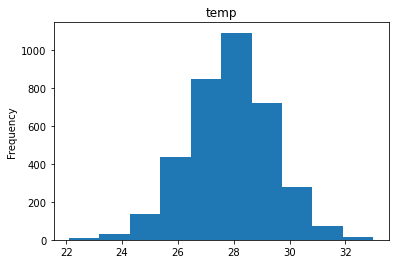

min temp:  22.1
max temp:  33.0


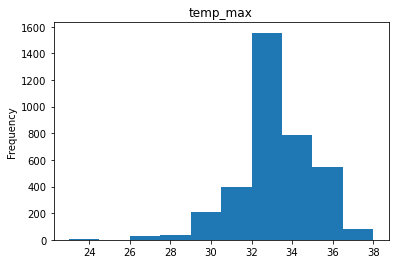

min temp_max:  23.0
max temp_max:  38.0


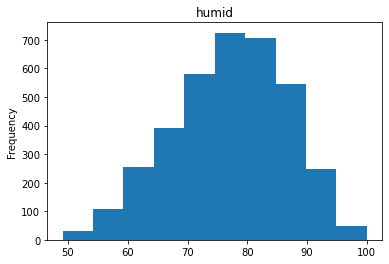

min humid:  49.1
max humid:  100.0


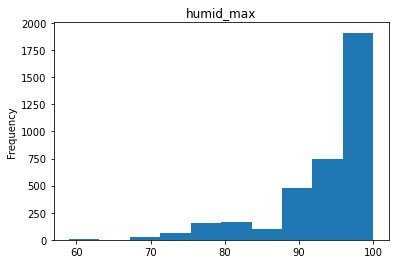

min humid_max:  59.0
max humid_max:  100.0


In [13]:
ana(df, 'temp')
ana(df, 'temp_max')
ana(df, 'humid')
ana(df, 'humid_max')

#### Biểu đồ quan hệ giữa các biến dữ đoán và các biến ảnh hưởng
Vì số lượng biểu đồ quá nhiều nên chỉ vẽ các biểu đồ đại diện

In [14]:
def ana_related(ax, df, x, y):
    relation = df[[x, y]]
    
    return relation.plot(ax=ax, x=x, y=y, kind='scatter')
    

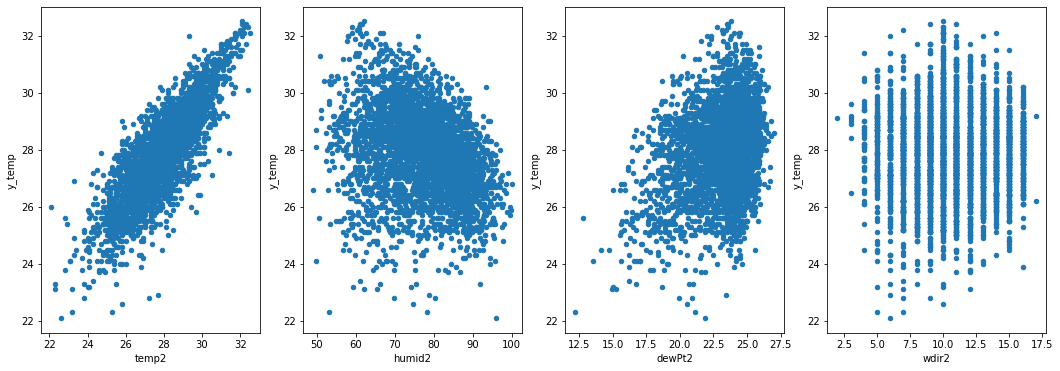

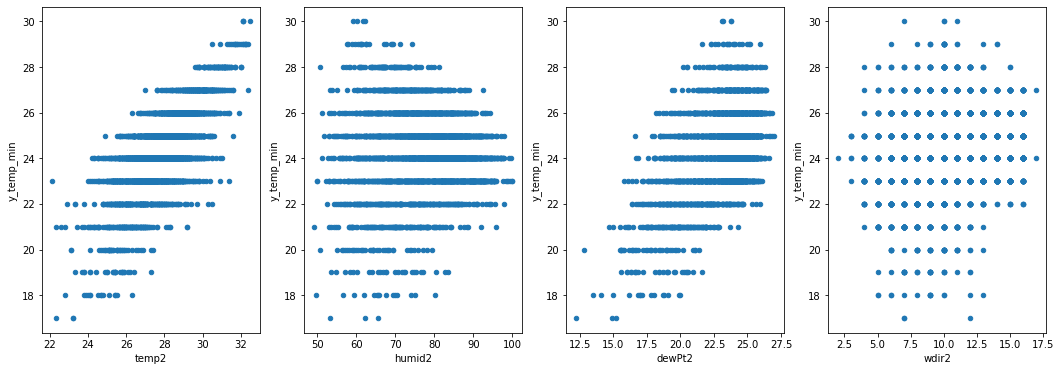

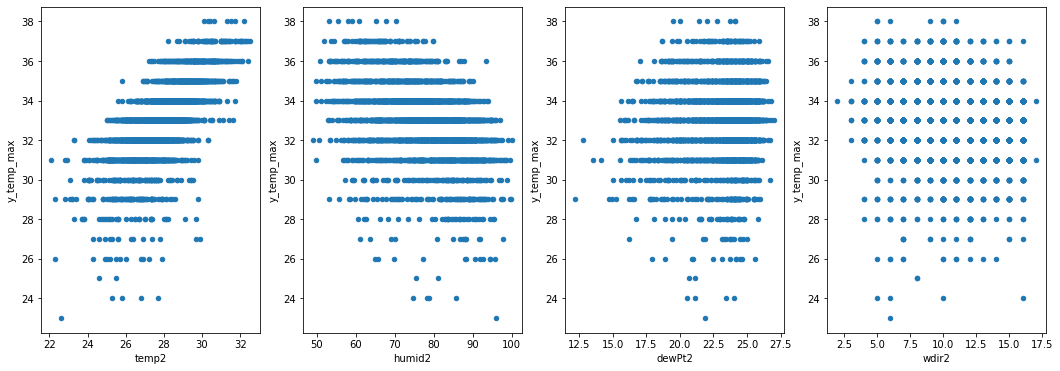

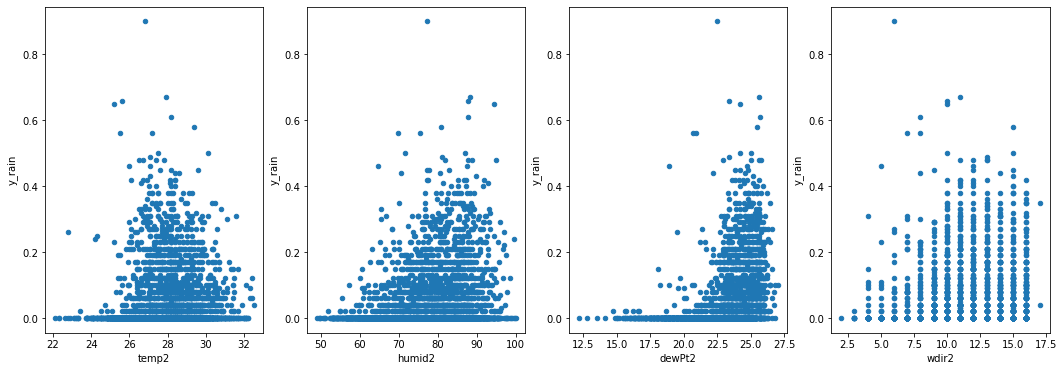

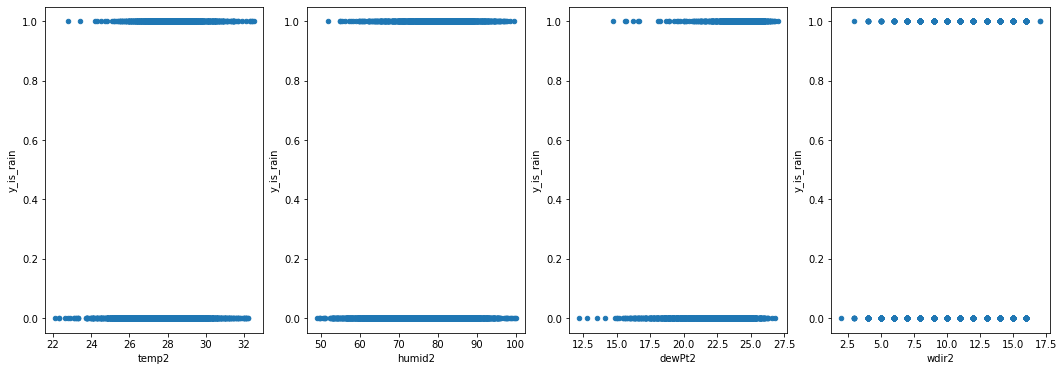

In [15]:
all_affect = ['temp2', 'humid2','dewPt2','wdir2']
all_affected = ['y_temp', 'y_temp_min', 'y_temp_max', 'y_rain', 'y_is_rain']

for affected in all_affected:
    fig = plt.figure(figsize = (18,6))
    
    for affect_id in range(len(all_affect)):
        
        ax = fig.add_subplot(1, len(all_affect), affect_id+1)
        ana_related(ax, df, all_affect[affect_id], affected)

**Từ đây ta thấy rằng, nếu chỉ dựa vào phân tích linear biến y_temp là dễ dự đoán nhất, kế tới là y_temp_max, biến y_temp_min hơi khó dự đoán (phải dựa vào nhiều biến khác như đã trình bày ở các phần trên), biến y_rain vẫn có thể dự đoán được nhưng không chính xác, còn biến y_is_rain hầu như không thể dự đoán được**